In [1]:
from sklearn.datasets import load_boston

In [3]:
boston = load_boston()

X=boston.data
Y=boston.target

In [5]:
print(X.shape)
print(Y.shape)

(506, 13)
(506,)


In [6]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [8]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [10]:
import pandas as pd
df=pd.DataFrame(X)
df.head()

Matplotlib is building the font cache; this may take a moment.


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [11]:
df.columns=boston.feature_names
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [12]:
#normalize the dataset
#axis=0 means along the column and axis=1 means along the row
#since we want to find the mean along a column to find the mean and std to normalize the data
import numpy as np
u=np.mean(X,axis=0)
std=np.std(X,axis=0)
print(u.shape)

(13,)


In [14]:
#normalize the data
X=(X-u)/std
pd.DataFrame(X[:5,:]).head()


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.469369,-0.475498,-1.812878,-1.346909,-6.037437,-8.364118,-2.442830,-1.737393,-1.210791,-2.428595,-9.207734,-3.905866,-1.924393
1,-0.469085,-0.508655,-1.711540,-1.346909,-11.186268,-8.676684,-2.425506,-1.539190,-1.197575,-2.430500,-8.673286,-3.905866,-1.842655
2,-0.469085,-0.508655,-1.711540,-1.346909,-11.186268,-7.126030,-2.448015,-1.539190,-1.197575,-2.430500,-8.673286,-3.906355,-1.943060
3,-0.469016,-0.508655,-1.815646,-1.346909,-12.007096,-7.505575,-2.467363,-1.291723,-1.184359,-2.431205,-8.480885,-3.906139,-1.964477
4,-0.468519,-0.508655,-1.815646,-1.346909,-12.007096,-7.203157,-2.456741,-1.291723,-1.184359,-2.431205,-8.480885,-3.905866,-1.917516


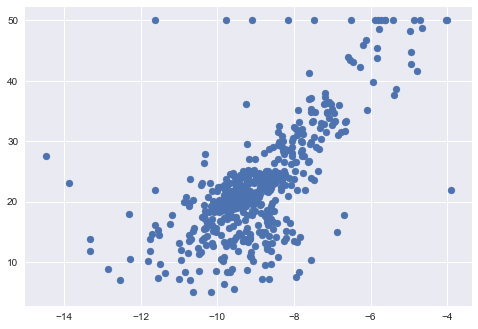

In [19]:
#plot Y vs any feature
#example: 5th feature
import matplotlib.pyplot as plt
plt.style.use('seaborn')
plt.scatter(X[:,5],Y)
plt.show()

In [34]:
#define a hypothesis function
ones=np.ones((X.shape[0],1))
X=np.hstack((ones,X))
def hypothesis(x,theta):
    y_=0.0
    n=x.shape[0]
    for i in range(n):
        y_+=(theta[i]*x[i])
    return y_
def error(X,y,theta):
    e=0.0
    m=X.shape[0]
    for i in range(m):
        y_=hypothesis(X[i], theta)
        e+=(y[i]-y_)**2
    return e/m

    
def gradient(X,y, theta):
    m,n=X.shape
    grad=np.zeros((n,))
    for j in range(n):
        for i in range(m):
            y_=hypothesis(X[i],theta)
            grad[j]+=(y_-y[i]*X[i][j])
    return grad/m
    
def gradientDescent(X,y,learning_rate=0.1,max_epochs=300):
    m,n=X.shape
    theta=np.zeros((n,))
    error_list=[]
    
    for i in range(max_epochs):
        e=error(X,y,theta)
        error_list.append(e)
        
        grad=gradient(X,y,theta)
        
        for j in range(n):
            theta[j]=theta[j]-learning_rate*grad[j]
            
    return theta,error_list        
    

In [36]:
import time
start=time.time()
theta,error_list=gradientDescent(X,Y)
end=time.time()
print('time taken is',end-start)

<ipython-input-34-c03d4f0af3b0>:16: RuntimeWarning: overflow encountered in double_scalars
  e+=(y[i]-y_)**2


time taken is 105.84262275695801


ValueError: setting an array element with a sequence.

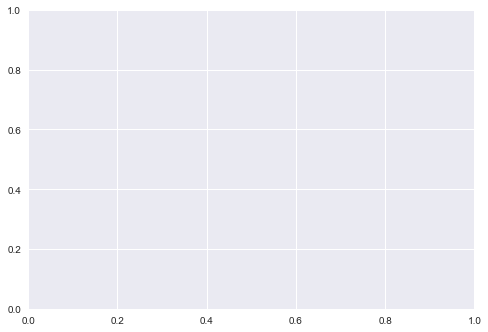

In [33]:
plt.plot(error_list)

In [42]:
def hypothesis(X,theta):
    return np.dot(X,theta)

def error(X,y,theta):
    error=0.0
    m=X.shape[0]
    y_=hypothesis(X,theta)
    e=np.sum((y-y_)**2)
    
    return e/m
def gradient(X,y,theta):
    y_=hypothesis(X,theta)
    grad=np.dot(X.T,(y_-y))
    m=X.shape[0]
    return grad/m
def gradientDescent(X,y,learning_rate=0.1,max_iters=300):
    n=X.shape[1]
    theta=np.zeros((n,))
    error_list=[]
    for i in range(max_iters):
        e=error(X,y,theta)
        error_list.append(e)
    
        grad=gradient(X,y,theta)
        theta=theta-learning_rate*grad
    return theta,error_list

In [43]:
theta,error_list=gradientDescent(X,Y)

c:\users\vibhu\appdata\local\programs\python\python38-32\lib\site-packages\numpy\core\fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-42-fed79755fbd5>:8: RuntimeWarning: overflow encountered in square
  e=np.sum((y-y_)**2)
